<a href="https://www.kaggle.com/code/leonardoterra/eda-bank-transactions?scriptVersionId=228568850" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Dataset**
--

# **Bank Transactions Dataset**
    Data Science EDA
    
## **Data Description**
This analysis is based on a dataset extracted from Kaggle.com. This dataset presents us data related to bank transactions including transactions flagged as fraud. The goal of this analysis is to evaluate the collected data to gain more knowledge and build a predctive model capable of indicating if a transaction is likely to be fraudulent or not.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings 
warnings.filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transaction-data-for-banking-operations/transaction_data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df= pd.read_csv('/kaggle/input/transaction-data-for-banking-operations/transaction_data.csv')
df.head()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",Desktop,Slice3,10,179,3075
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",Mobile,Slice2,11,89,2369
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",Mobile,Slice1,4,53,8039
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",Mobile,Slice3,10,127,6374
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",Mobile,Slice3,20,191,8375


# **EDA**

## **Organizing Dataset**
--

In [4]:
#Creating Data dictionary

df_dict = {
    "Transaction ID": "Unique identifier for each transaction, ensuring traceability.",
    "Sender Account ID": "The account number of the transaction sender.",
    "Receiver Account ID": "The account number of the transaction receiver.",
    "Transaction Amount": "The monetary value involved in the transaction.",
    "Transaction Type": "The type of transaction—Transfer, Withdrawal, or Deposit.",
    "Timestamp": "The exact date and time the transaction occurred.",
    "Transaction Status": "Indicates whether the transaction was successful (1) or failed (0).",
    "Fraud Flag": "A binary flag indicating whether the transaction was flagged as fraudulent (1).",
    "Geolocation (Latitude/Longitude)": "Geographic coordinates of the transaction, helpful for spatial analysis.",
    "Device Used": "The type of device used for conducting the transaction (Mobile or Desktop).",
    "Network Slice ID": "Identifies the 6G network slice used during the transaction.",
    "Latency (ms)": "The delay (in milliseconds) experienced during the transaction.",
    "Slice Bandwidth (Mbps)": "The bandwidth available in the network slice used for the transaction.",
    "PIN Code": "A four-digit security code used for the transaction (masked for privacy)."
}

In [5]:
df.shape

(1000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction ID                    1000 non-null   object 
 1   Sender Account ID                 1000 non-null   object 
 2   Receiver Account ID               1000 non-null   object 
 3   Transaction Amount                1000 non-null   float64
 4   Transaction Type                  1000 non-null   object 
 5   Timestamp                         1000 non-null   object 
 6   Transaction Status                1000 non-null   object 
 7   Fraud Flag                        1000 non-null   bool   
 8   Geolocation (Latitude/Longitude)  1000 non-null   object 
 9   Device Used                       1000 non-null   object 
 10  Network Slice ID                  1000 non-null   object 
 11  Latency (ms)                      1000 non-null   int64  
 12  Slice B

In [7]:
for column in df.columns:
    num_distinct = len(df[column].unique())
    print(f"{column}: {num_distinct} distinct values")

Transaction ID: 1000 distinct values
Sender Account ID: 994 distinct values
Receiver Account ID: 994 distinct values
Transaction Amount: 998 distinct values
Transaction Type: 3 distinct values
Timestamp: 60 distinct values
Transaction Status: 2 distinct values
Fraud Flag: 2 distinct values
Geolocation (Latitude/Longitude): 36 distinct values
Device Used: 2 distinct values
Network Slice ID: 3 distinct values
Latency (ms): 18 distinct values
Slice Bandwidth (Mbps): 199 distinct values
PIN Code: 948 distinct values


In [8]:
df.head()

,Transaction ID,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Geolocation (Latitude/Longitude),Device Used,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),PIN Code
0,TXN9520068950,ACC14994,ACC16656,495.90,Deposit,2025-01-17 10:14:00,Failed,True,"34.0522 N, -74.006 W",Desktop,Slice3,10,179,3075
1,TXN9412011085,ACC58958,ACC32826,529.62,Withdrawal,2025-01-17 10:51:00,Success,False,"35.6895 N, -118.2437 W",Mobile,Slice2,11,89,2369
2,TXN4407425052,ACC56321,ACC92481,862.47,Withdrawal,2025-01-17 10:50:00,Failed,False,"48.8566 N, 2.3522 W",Mobile,Slice1,4,53,8039
3,TXN2214150284,ACC48650,ACC76457,1129.88,Transfer,2025-01-17 10:56:00,Success,True,"34.0522 N, -74.006 W",Mobile,Slice3,10,127,6374
4,TXN4247571145,ACC60921,ACC11419,933.24,Deposit,2025-01-17 10:25:00,Success,True,"55.7558 N, 37.6173 W",Mobile,Slice3,20,191,8375


In [9]:
#Dropping columsn that don't help in the analysis

df.drop('Transaction ID', axis=1, inplace=True)
df.drop('PIN Code', axis=1, inplace=True)

In [10]:
#Treating date & Timestamp columns

'''
df.insert(loc=0, column='Date', value=df['Timestamp'])
df['Date'] = pd.to_datetime(df['Timestamp']).dt.strftime('%d/%m/%Y')
'''

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].astype('int64') // 10**9  # Convert to seconds

In [11]:
# Treating Lat and Long columns

df['Latitude'] = df['Geolocation (Latitude/Longitude)'].str.split(",").str[0].str.split("N").str[0]
df['Longitude'] = df['Geolocation (Latitude/Longitude)'].str.split(",").str[1].str.split("W").str[0]
df.drop('Geolocation (Latitude/Longitude)', axis=1, inplace=True)

df['Sender Account ID'] = df['Sender Account ID'].str.replace("ACC","")
df['Receiver Account ID'] = df['Receiver Account ID'].str.replace("ACC","")

In [12]:
#Feature Enconding Columns for better analaysis

df['Transaction Type'] = df['Transaction Type'].map({
    'Deposit':1,
    'Withdrawal':2,
    "Transfer": 3
})

df['Transaction Status'] = df['Transaction Status'].map({
    'Failed':0,
    'Success':1
})
df['Fraud Flag'] = df['Fraud Flag'].astype(int)

df['Network Slice ID'] = df['Network Slice ID'].map({
    'Slice1':1,
    'Slice2':2,
    'Slice3':3
})

In [13]:
# One-hot encoding for "Device Used" and 'Transaction Type' 
df_encoded = pd.get_dummies(df, columns=['Device Used'],dtype="int64", drop_first=True,)
df_encoded

,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),Latitude,Longitude,Device Used_Mobile
0,14994,16656,495.90,1,1737108840,0,1,3,10,179,34.0522,-74.006,0
1,58958,32826,529.62,2,1737111060,1,0,2,11,89,35.6895,-118.2437,1
2,56321,92481,862.47,2,1737111000,0,0,1,4,53,48.8566,2.3522,1
3,48650,76457,1129.88,3,1737111360,1,1,3,10,127,34.0522,-74.006,1
4,60921,11419,933.24,1,1737109500,1,1,3,20,191,55.7558,37.6173,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,79886,14903,1340.76,3,1737110940,1,0,2,19,224,35.6895,-118.2437,1
996,95972,50750,483.36,2,1737111600,0,1,2,12,56,55.7558,37.6173,1
997,95938,18507,199.81,2,1737111240,1,0,1,14,151,34.0522,139.6917,0
998,76523,95234,1341.86,3,1737111540,1,1,3,8,95,51.5074,139.6917,1


## **Statistical Analysis**

#### **Correlation Analysis**
--

In [14]:
df_encoded.corr()

,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),Latitude,Longitude,Device Used_Mobile
Sender Account ID,1.000000,0.005203,0.010714,-0.001952,-0.011448,-0.010660,0.044120,0.025311,0.045553,-0.032049,0.009286,-0.011792,-0.004359
Receiver Account ID,0.005203,1.000000,0.034987,-0.037483,0.006453,0.020133,-0.007455,-0.012630,-0.033553,-0.001798,-0.006197,-0.017880,0.031437
Transaction Amount,0.010714,0.034987,1.000000,-0.014669,-0.042235,0.044733,0.038651,-0.023345,-0.027259,0.006563,0.011351,-0.015497,0.006978
Transaction Type,-0.001952,-0.037483,-0.014669,1.000000,0.003821,0.033208,-0.060137,-0.008635,-0.002330,0.013526,-0.015342,0.009429,0.011552
Timestamp,-0.011448,0.006453,-0.042235,0.003821,1.000000,0.049673,0.012084,-0.001506,-0.027085,0.028196,0.008194,-0.016060,0.017678
Transaction Status,-0.010660,0.020133,0.044733,0.033208,0.049673,1.000000,-0.013002,0.012763,-0.033565,0.043477,-0.025587,-0.019728,-0.010921
Fraud Flag,0.044120,-0.007455,0.038651,-0.060137,0.012084,-0.013002,1.000000,0.032687,0.006271,-0.018012,0.010579,-0.012538,0.065701
Network Slice ID,0.025311,-0.012630,-0.023345,-0.008635,-0.001506,0.012763,0.032687,1.000000,-0.003752,0.043479,-0.051013,-0.035045,-0.079584
Latency (ms),0.045553,-0.033553,-0.027259,-0.002330,-0.027085,-0.033565,0.006271,-0.003752,1.000000,0.064404,-0.003973,0.019482,-0.016566
Slice Bandwidth (Mbps),-0.032049,-0.001798,0.006563,0.013526,0.028196,0.043477,-0.018012,0.043479,0.064404,1.000000,-0.007639,-0.006922,-0.043331


In [15]:
# Filtering correlation matrix to see which independent variables that have more correlation with the main dependent variable
df_corr = df_encoded.corr()
df_filter_corr = df_corr[((df_corr >= 0.02) | (df_corr <= -0.02)) & (df_corr != 1.000)]
df_filter_corr

,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Fraud Flag,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),Latitude,Longitude,Device Used_Mobile
Sender Account ID,NaN,NaN,NaN,NaN,NaN,NaN,0.044120,0.025311,0.045553,-0.032049,NaN,NaN,NaN
Receiver Account ID,NaN,NaN,0.034987,-0.037483,NaN,0.020133,NaN,NaN,-0.033553,NaN,NaN,NaN,0.031437
Transaction Amount,NaN,0.034987,NaN,NaN,-0.042235,0.044733,0.038651,-0.023345,-0.027259,NaN,NaN,NaN,NaN
Transaction Type,NaN,-0.037483,NaN,NaN,NaN,0.033208,-0.060137,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp,NaN,NaN,-0.042235,NaN,NaN,0.049673,NaN,NaN,-0.027085,0.028196,NaN,NaN,NaN
Transaction Status,NaN,0.020133,0.044733,0.033208,0.049673,NaN,NaN,NaN,-0.033565,0.043477,-0.025587,NaN,NaN
Fraud Flag,0.044120,NaN,0.038651,-0.060137,NaN,NaN,NaN,0.032687,NaN,NaN,NaN,NaN,0.065701
Network Slice ID,0.025311,NaN,-0.023345,NaN,NaN,NaN,0.032687,NaN,NaN,0.043479,-0.051013,-0.035045,-0.079584
Latency (ms),0.045553,-0.033553,-0.027259,NaN,-0.027085,-0.033565,NaN,NaN,NaN,0.064404,NaN,NaN,NaN
Slice Bandwidth (Mbps),-0.032049,NaN,NaN,NaN,0.028196,0.043477,NaN,0.043479,0.064404,NaN,NaN,NaN,-0.043331


In [16]:
# Filtering correlation matrix to find Multicollinearity
dfcorr = df_encoded.corr()
df_filter_multi = dfcorr[((dfcorr >= 0.065) | (dfcorr <= -0.065)) & (dfcorr != 1.000)]
df_filter_multi = df_filter_multi.drop('Fraud Flag', axis=1)
df_filter_multi = df_filter_multi.drop('Fraud Flag', axis=0)
df_filter_multi

,Sender Account ID,Receiver Account ID,Transaction Amount,Transaction Type,Timestamp,Transaction Status,Network Slice ID,Latency (ms),Slice Bandwidth (Mbps),Latitude,Longitude,Device Used_Mobile
Sender Account ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Receiver Account ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction Amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Network Slice ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.079584
Latency (ms),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Slice Bandwidth (Mbps),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Defining final Dataset

df_final = df_encoded[['Sender Account ID','Transaction Amount','Transaction Type','Device Used_Mobile', 'Fraud Flag']]

mask = df_final['Fraud Flag'] == 1
df_fraud_true = df_final[mask]

df_final

,Sender Account ID,Transaction Amount,Transaction Type,Device Used_Mobile,Fraud Flag
0,14994,495.90,1,0,1
1,58958,529.62,2,1,0
2,56321,862.47,2,1,0
3,48650,1129.88,3,1,1
4,60921,933.24,1,1,1
...,...,...,...,...,...
995,79886,1340.76,3,1,0
996,95972,483.36,2,1,1
997,95938,199.81,2,0,0
998,76523,1341.86,3,1,1


#### **Data Visualization**
--

Dataset resembles an uniform distribution for total amount, which means that every value has the same likehood to the same outcome (being a fraud or not)


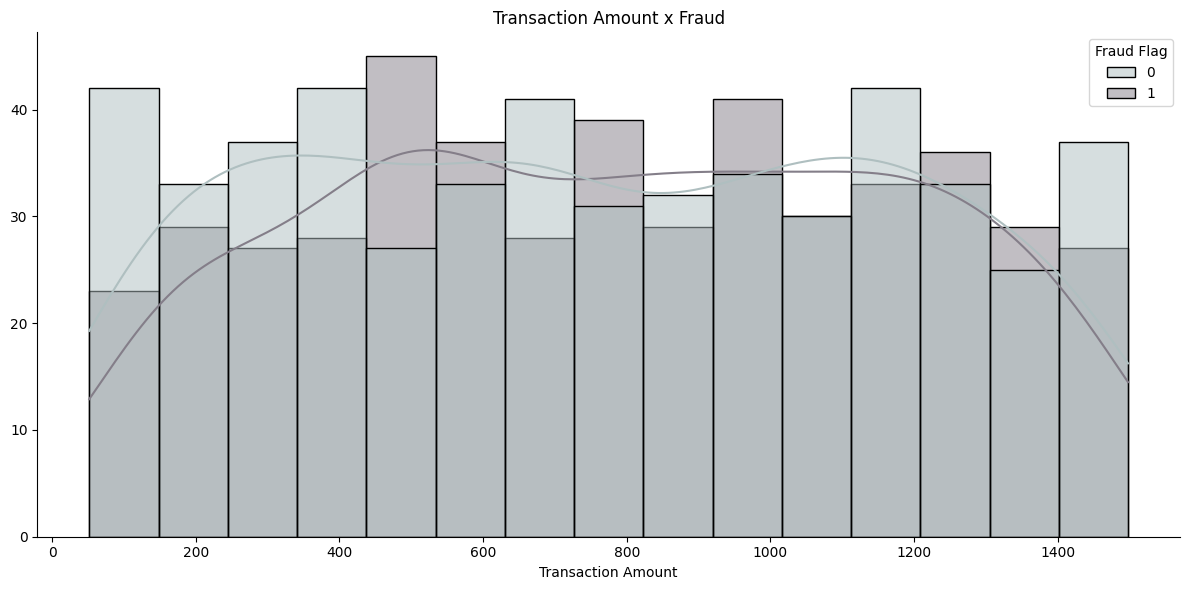

In [18]:
colors = ['#AFBFC0','#847E89','#C2D3CD']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax = sns.histplot(data=df_final, x='Transaction Amount', hue='Fraud Flag', palette=colors, kde=True, ax=ax, bins=15)
ax.set_ylabel('',fontsize=14)
ax.set_title('Transaction Amount x Fraud',fontsize=12)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

print('Dataset resembles an uniform distribution for total amount, which means that every value has the same likehood to the same outcome (being a fraud or not)')

Most fradulent transactions occur in mobile devices


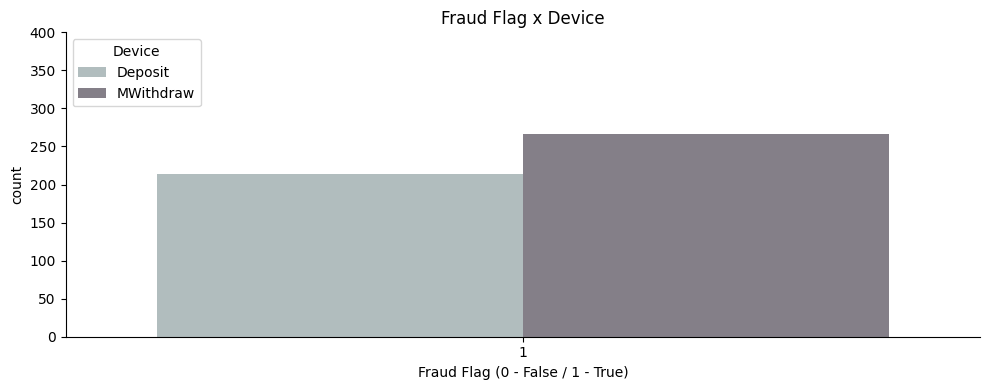

In [19]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_fraud_true, x='Fraud Flag', hue='Device Used_Mobile', palette=colors)
# Add a title
plt.title("Fraud Flag x Device")

plt.legend(title='Device', loc='upper left',labels=['Deposit', 'MWithdraw'])
plt.xlabel("Fraud Flag (0 - False / 1 - True)")
plt.ylim(0, 400)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

print('Most fradulent transactions occur in mobile devices')

Most fradulent transactions occur during Deposits or Transfers


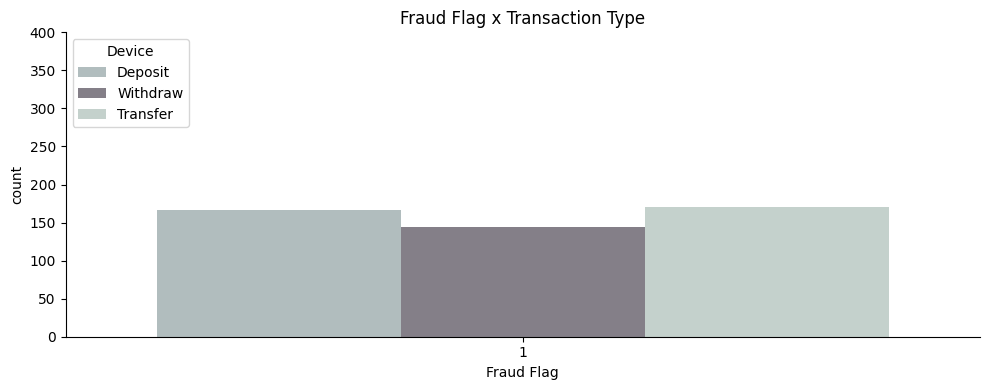

In [20]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df_fraud_true, x='Fraud Flag', hue='Transaction Type', palette=colors)

plt.title("Fraud Flag x Transaction Type")
plt.legend(title='Device', loc='upper left',labels=['Deposit', 'Withdraw', 'Transfer'])
plt.xlabel("Fraud Flag")
plt.ylim(0, 400)

sns.despine(left=False, right=True, top=True, bottom=False)
plt.tight_layout()

print('Most fradulent transactions occur during Deposits or Transfers')

## **Insights:**
--

### **Statistics**:
* The Fraud Flag is most correlated with the type of device and transaction type.

### **Fraud Flag vs Features**:
* Transaction amount presents a uniform distribution, which means that transactions of any amount can be flagged as fraud, which makes it more difficult to identify them
* Mobile devices lead the race with more fraudulent transactions than other devices (desktops)
* Transfers and Deposits are the type of transactions with most frauds.

# **Predctive Analysis**

## **Data Preparation**
--

In [21]:
#Scaling data for better ML models
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

X = df_final.drop(['Fraud Flag'], axis=1)
y = df_final['Fraud Flag']

# Fit and transform the data
X_scaled = scaler.fit_transform(X)

## **Model Testing**
--

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [23]:
# Function to run model metrics

def model_metrics(x):
    accuracy = accuracy_score(y_test,y_predict) * 100
    class_atrix = classification_report(y_test,y_predict)
    
    print(class_atrix)
    print("Accuracy: %.2f%%" % accuracy)

In [24]:
#Function to validade results

def validation_results(results):
  mean = results['test_score'].mean()
  std = results['test_score'].std()
  print("A. Accuracy: %.2f" % (mean * 100))
  print("Accuracy interval: [%.2f, %.2f]" % ((mean - 2 * std)*100, (mean + 2 * std) * 100))

In [25]:
#Function to run models 

def models(X, y):

    # Dictionary of models
    models = {
        "Dummy": DummyClassifier(strategy='stratified', random_state=42),
        "Logistic Regression": LogisticRegression(),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Decision Tree": DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42),
        "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
        
    }

    # Dictionary to store results
    results = {}

    # Training and evaluating models
    for name, model in models.items():
        if name == "Logistic Regression" or name == "K-Nearest Neighbors":
            X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
            model.fit(X_train, y_train)  # Train the model
            y_pred = model.predict(X_test)  # Make predictions
            accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
            results[name] = round(accuracy*100,2)  # Store results
        else:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model.fit(X_train, y_train)  # Train the model
            y_pred = model.predict(X_test)  # Make predictions
            accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy
            results[name] = round(accuracy*100,2)  # Store results
    print(results)            

In [26]:
models(X, y)

{'Dummy': 54.5, 'Logistic Regression': 50.5, 'K-Nearest Neighbors': 42.5, 'Decision Tree': 45.5, 'Random Forest': 47.5}


## **Definitions & Insights**
--

### **Base Models**:
* All base models present bad results when compared to the Dummy classifier.

### **Strategies:**
* No more tests will the run since the model doesn't present enough data capable of improving the models. Feature engeneering might be an option to help get better results.

# **Thank You for taking the time to view this Notebook**!
​
If you found this analysis informative or have any feedback or suggestions, don't hesitate to say! 